# Functions

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

plt.rcParams['figure.facecolor'] = 'white'

In [175]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [176]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [177]:
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1212\\'
ensure_dir(exp_folder+'STA')
ensure_dir(exp_folder+'STA\\Fig')

In [178]:
filenames = os.listdir(exp_folder+'STA\\')

In [179]:
figureTitle = 'dMCC=0.3_TK.png'

legend = ['M='+str(M) for M in [4,7,10,13,19,31,49]]
Indexes =[1j, 49,39,42]

STA_merge_1211_WF_WN_7-0.3mW.npz
STA_merge_1211_WF_WN_10-0.3mW.npz
STA_merge_1211_WF_WN_13-0.3mW.npz


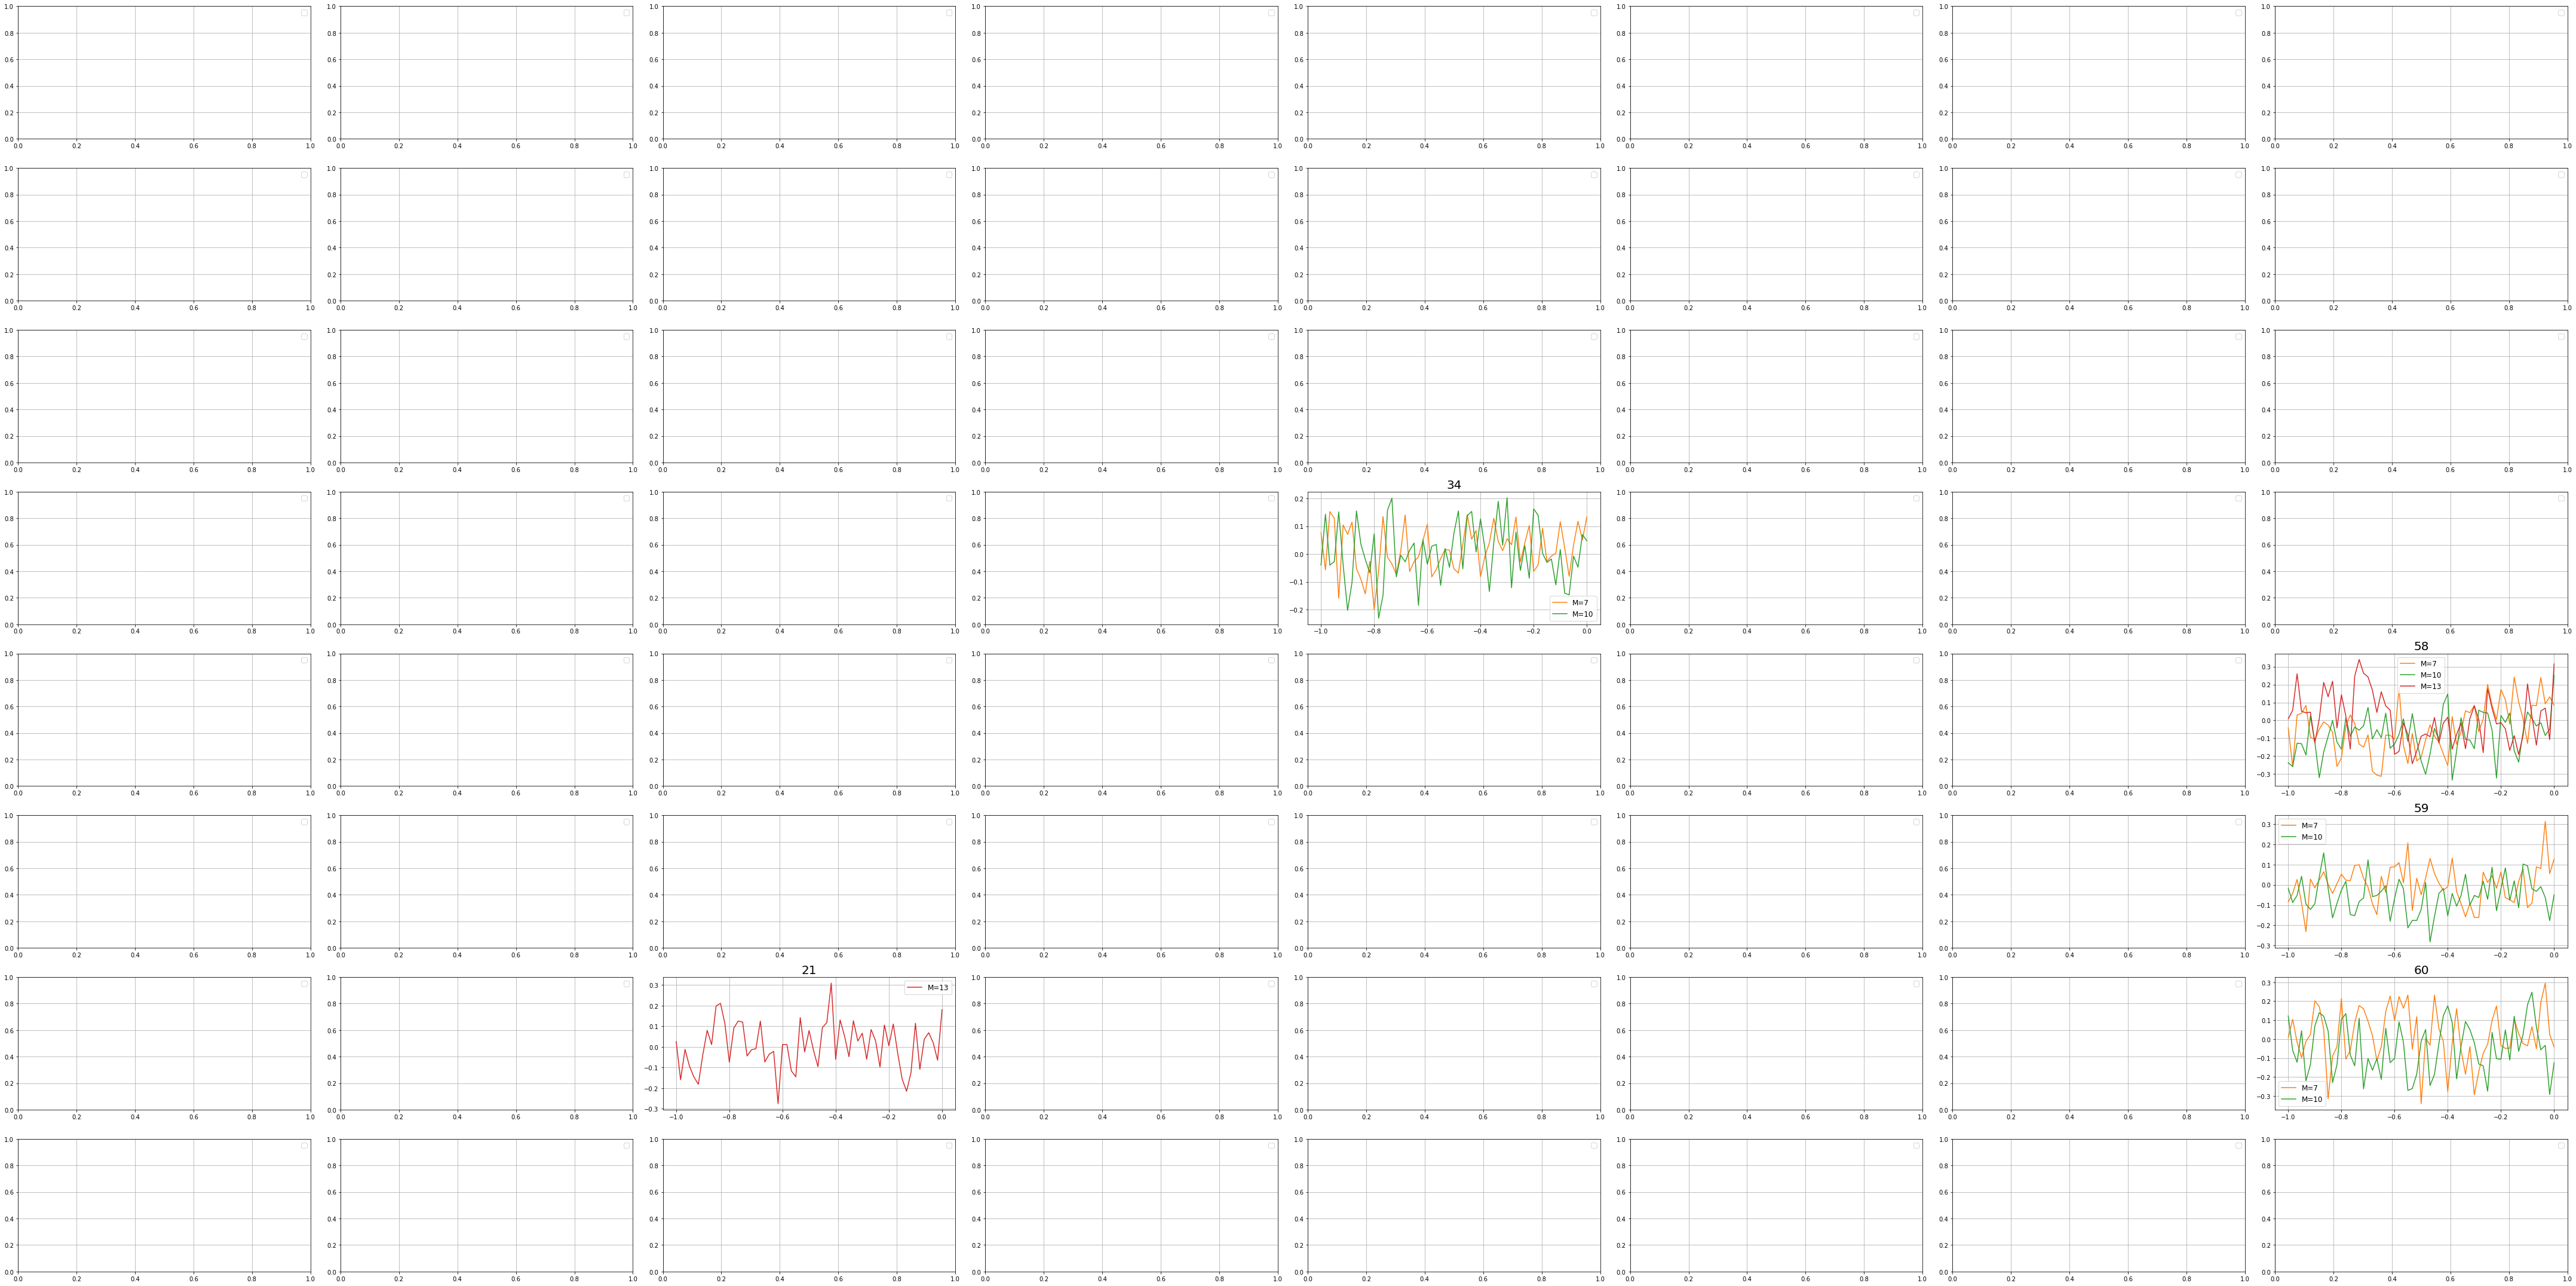

In [180]:
MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
cmind = 0
for i in Indexes:
    if i == 1j:
        cmind += 1
        continue
    print(filenames[i])
    loadfiles = np.load(exp_folder+'STA\\'+filenames[i], allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]

    for cn in range(60):
        STA = STA_cell[cn]
        try:
            # MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,STA, label=legend[cmind], color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift[:61],STA[:61], label=legend[cmind], color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
        except:
            continue
#         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
#         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
    cmind += 1

for ax1d in MIdFcax:
    for ax in ax1d:
        ax.legend(fontsize = 12)
        ax.grid()
        
MIdFcfig.set_size_inches(60, 30)
MIdFcfig.tight_layout()
MIdFcfig.savefig(exp_folder+'STA\\Fig\\'+figureTitle, bbox_inches = 'tight',pad_inches = 0.3, dpi=300)